## Bibliotecas

In [1]:
import subprocess
import os
import sys
import gdal, gdalconst
import rasterio
import numpy as np
import numpy.ma as ma
import tkinter as tk
from tkinter import filedialog
import whitebox


import matplotlib.pyplot as plt


driver = gdal.GetDriverByName("GTiff")

## Definicoes

In [2]:
driver = gdal.GetDriverByName("GTiff")
x_dim = 1910
y_dim = 1070

In [3]:
#Endereços dos rasters de entrada

dtm = r"C:\Users\artur\OneDrive\Documentos\IHC\Entradas\Removed_pits_WB.tif"

weighting = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/Wrs_A.tif'
ips = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/E2_IPS.tif'
q_run_off = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/E2_Qsup.tif'

#Raster saida
endereco_processos= 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento'
endereco_saida = 'C:/Users/artur/OneDrive/Documentos/IHC/Saida'

In [4]:
#Montando os rasters de entrada
ips = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/E2_IPS.tif'
IPS = os.path.join(ips)
Pits_Removed_DTM = os.path.join(dtm)
Weighting_Factor = os.path.join(weighting)

Qrunoff = os.path.join (q_run_off)
IHC = os.path.join(endereco_saida, "ihc_nodata_fixed.tif")


In [5]:
#paths to the arcgis generated files

accfinal_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\ACCfinal.tif'
accq_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\accq.tif'
accs_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\accS.tif'
accw_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\accW.tif'
cmean_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\cmean.tif'
ddn_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\Ddn.tif'
fillokad8_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfillokad8.tif'
fillokang_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfillokang.tif'
fillokp_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfillokp.tif'
filloksca_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfilloksca.tif'
filloksd8_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfilloksd8.tif'
fillokslp_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\dtmfillokslp.tif'
dup_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\Dup.tif'
flowdir_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\flowdir.tif'
invcs_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\invCS.tif'
ipsxqr_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\IPSxQr.tif'
qrunm_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\qrunm.tif'
resolution_arc =r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\resolution.tif'
s_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\s.tif'
smean_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\smean.tif'
x_arc = r'C:\Users\artur\OneDrive\Documentos\IHC\IHC_ARCGIS\Workspace\X.tif'




## Calculos

#### raster_comparison

In [6]:
#Function to compare two different rasters. We want to check if the raster generated by the algorithms are the same as the arcgis ones
def mascara(src):
  data = src.read(1)
  data_nodata = src.nodata
  masked = data == data_nodata
  masked_data = np.ma.masked_array(data, mask=masked, fill_value=src.nodata)  # Set fill_value to nodata
  return masked_data, data_nodata


def raw_raster_comparison (raster1, raster2):
   with rasterio.open(raster1) as src1, rasterio.open(raster2) as src2:
      data1 = src1.read(1)
      data2 = src2.read(1)
      nodata1 = src1.nodata
      nodata2 = src2.nodata

      # comparison = np.array_equal(data1, data2)
      comparison = np.isclose(data1,data2, rtol=1e-3)

      print (f'They are equal: {comparison}')
      print(f'nodata1: {nodata1}')
      print(f'nodata2: {nodata2}')

      return comparison
   
def raster_close_enough (raster1, raster2):
#raster 1 and raster 2 are the paths to the rasters
  with rasterio.open(raster1) as src1, rasterio.open(raster2) as src2:

      data_1,nodata1 = mascara(src1)

      data_2,nodata2 = mascara(src2)

      comparison = np.isclose(data_1,data_2, rtol=1e-3)
      # comparison = np.array_equal(data_1,data_2,)
      # diff = np.ma.subtract(data_1, data_2)

      # diferenca = np.ma.sum(diff)
      iguais = np.all(comparison)

      print (f'They are close enough: {iguais}')
      print(f'nodata1: {nodata1}')
      print(f'nodata2: {nodata2}')
      # print(f'element-wise difference: {diferenca}')


      return 



def raster_comparison (raster1, raster2):
    #raster 1 and raster 2 are the paths to the rasters
    with rasterio.open(raster1) as src1, rasterio.open(raster2) as src2:

        data_1,nodata1 = mascara(src1)

        data_2,nodata2 = mascara(src2)

        comparison = np.array_equal(data_1,data_2)

        print (f'They are equal: {comparison}')
        print(f'nodata1: {nodata1}')
        print(f'nodata2: {nodata2}')





#funcao para lidar com os valores de nodata

# Esta função recebe um raster aberto pelo rasterio.
# Ela primeiro lê os dados da primeira banda
# Em seguida salva o valor de no_data disponível nos metadados
# Cria uma máscara
# Aplica a máscara e define então um masked numpy array
# Ela devolve o masked numpy array e o valor do nodata (útil pra debugar)






### 2 - Computando Infinity Flow

In [7]:
#2 Computando Infinity Flow 
# Compute D-Infinity flow directions and slope
dtmfillokang_tif_path = os.path.join(endereco_processos, "dtmfillokang.tif").replace("\\", "/")
#print("VERIFICAR ESTE ENDERECO" + dtmfillokang_tif_path)
dtmfillokslp_tif_path = os.path.join(endereco_processos, "dtmfillokslp.tif").replace("\\", "/")


dtmfillokang_tif = driver.Create(dtmfillokang_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
dtmfillokslp_tif = driver.Create(dtmfillokslp_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64) 

dtmfillokang_tif = None
dtmfillokslp_tif = None

print("2 Computing D-infinity flow")
subprocess.run(["dinfflowdir","-ang", dtmfillokang_tif_path, "-slp", dtmfillokslp_tif_path, "-fel", Pits_Removed_DTM], check=True)


2 Computing D-infinity flow


CompletedProcess(args=['dinfflowdir', '-ang', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/dtmfillokang.tif', '-slp', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/dtmfillokslp.tif', '-fel', 'C:\\Users\\artur\\OneDrive\\Documentos\\IHC\\Entradas\\Removed_pits_WB.tif'], returncode=0)

In [8]:
# raster_comparison(dtmfillokang_tif_path, fillokang_arc)
# raster_comparison(dtmfillokslp_tif_path, fillokslp_arc)

In [9]:
#It's proved that both of them are exactly the same!

with rasterio.open(dtmfillokang_tif_path) as src1, rasterio.open(fillokang_arc) as src2:

        data_1 = src1.read(1)
        data_2 = src2.read(1)


        comparison = np.array_equal(data_1,data_2)

        diff = np.subtract(data_1,data_2)

        diff_squared =np.power(diff, 2)

        print (f'They are equal: {comparison}')
        print(diff_squared.sum())

        print(diff)


They are equal: True
0.0
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


#### Nodata_Normalisation

In [10]:
#alguns dos nossos outputs estao vindo com o nodata value de -1. Para isso, precisamos normalizar.
def noData_Normalisation(file_path):

    #Defining a normalised nodata_value
    new_nodata_value = -3.4028234663852886e+38
    
    with rasterio.open(file_path) as src:
    #readin g the file
        file_values = src.read(1)
        old_NoData = src.nodata
        file_profile = src.profile

        if src.nodata != new_nodata_value:
            file_nodata = src.nodata
            
        
        #changing the nodata value    
            file_values = np.where(file_values == file_nodata, new_nodata_value, file_values)
            file_profile.update(nodata = new_nodata_value)
            print(src.nodata)

    #updating the file
    with rasterio.open(file_path,'w',**file_profile) as dst:
        dst.write(file_values, 1) 
        new_NoData = dst.nodata 
    

    print(f'The old noData is {old_NoData}, and the new noData is {new_NoData}.')


In [11]:
#noData_Normalisation(dtmfillokslp_tif_path)

### 3 - D8Flow Directions

In [12]:
# dtm = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/Fill_OK.tif'
dtm = r"C:\Users\artur\OneDrive\Documentos\IHC\Entradas\Removed_pits_WB.tif"
Pits_Removed_DTM = os.path.join(dtm)

In [13]:
#D8 Flow

# Process: D8 Flow Directions (D8 Flow Directions) ()
dtmfillokp_tif_path = os.path.join(endereco_processos, "dtmfillokp_wb.tif").replace("\\", "/")
dtmfilloksd8_tif_path = os.path.join(endereco_processos, "dtmfilloksd8.tif").replace("\\", "/")
dtmfillokp_tif = driver.Create(dtmfillokp_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
dtmfilloksd8_tif = driver.Create(dtmfilloksd8_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

dtmfillokp_tif = None
dtmfilloksd8_tif = None


    # 3
subprocess.run(["d8flowdir", "-p", dtmfillokp_tif_path, "-sd8", dtmfilloksd8_tif_path, "-fel", Pits_Removed_DTM], check=True)
print('3 D8 Flow complete')
print("")


3 D8 Flow complete



In [14]:
raster_comparison(dtmfillokp_tif_path, fillokp_arc)
raster_comparison(dtmfilloksd8_tif_path, filloksd8_arc)

They are equal: True
nodata1: -32768.0
nodata2: -32768.0
They are equal: True
nodata1: -1.0
nodata2: -1.0


In [15]:
# noData_Normalisation(dtmfillokp_tif_path)
# noData_Normalisation(dtmfilloksd8_tif_path)

### 8 - D8 Contibuting Area

In [16]:
#8

# Process: D8 Contributing Area (D8 Contributing Area) ()
fillad8_tif_path = os.path.join(endereco_processos, "dtmfillokad8.tif").replace("\\", "/")
fillad8_tif = driver.Create(fillad8_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

fillad8_tif = None

subprocess.run(["aread8","-p", dtmfillokp_tif_path, "-ad8", fillad8_tif_path,"-nc"], check=True)
print('D8 Contributing Area Complete')
print("")

D8 Contributing Area Complete



#### Finding out and selecting the outlet

In [17]:
#The outlet should have the highest accumulated value
target_tif_path = os.path.join(endereco_processos, "outlet.tif").replace("\\", "/")
target_tif = driver.Create(target_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
target_tif = None


t_tif_path = os.path.join(endereco_processos, "teste.tif").replace("\\", "/")
t_tif = driver.Create(target_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
t_tif = None

def mascara(src):
  data = src.read(1)
  data_nodata = src.nodata
  masked = data == data_nodata
  masked_data = np.ma.masked_array(data, mask=masked, fill_value=src.nodata)  # Set fill_value to nodata
  return masked_data, data_nodata



with rasterio.open(fillad8_tif_path) as src1 : 
    
    profile = src1.profile 

    values, nodata_value = mascara(src1)

    print(values)
    print(nodata_value)

    highest_value = values.max()
    print(highest_value)
   
    values = ma.where(values==highest_value, 1, 0)

    print(values)

# # Initialize outlet with 0s, apply the same mask
#     outlet = ma.masked_array(np.zeros(values.shape), mask=values.mask)
    
#     # Set outlet to 1 where values equal highest_value
#     outlet[values == highest_value] = 1
    


    
with rasterio.open(target_tif_path, 'w', **profile) as dst:
    dst.write(values, 1)
    print(dst.nodata)

# with rasterio.open(t_tif_path, 'w', **profile) as dst:
#     dst.write(values, 1)
#     print(dst.nodata)

print(" complete!")
print("")


[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
-1.0
895243.0
[[-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 ...
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]
 [-- -- -- ... -- -- --]]
-1.0
 complete!



### 9 - Accumulating W

In [18]:
#9 

# Process: accumulating W (D-Infinity Contributing Area) () #Verificar!
accW_tif_path = os.path.join(endereco_processos, "accW.tif").replace("\\", "/")
accW_tif = driver.Create(accW_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

accW_tif = None

subprocess.run(["areadinf","-ang", dtmfillokang_tif_path, "-sca", accW_tif_path, "-wg", Weighting_Factor, "-nc"],check=True)
print('Process: accumulating W  complete') 
print("")

# os.system((("mpiexec -n  AreaDinf -ang ").lower())+filename[0:-4]+"ang.tif"+ " -sca " +dir_path+"/accW.tif -wg "+filewgt+" -nc")

Process: accumulating W  complete



In [19]:
raster_comparison(accW_tif_path, accw_arc)

They are equal: True
nodata1: -1.0
nodata2: -1.0


In [20]:
raw_raster_comparison(accW_tif_path, accw_arc)

They are equal: [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
nodata1: -1.0
nodata2: -1.0


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

In [21]:
# noData_Normalisation(accW_tif_path)

### 5 - D Infinity Contributing Area

In [22]:
#5
# Process: D-Infinity Contributing Area (D-Infinity Contributing Area) 
dtmfilloksca_tif_path = os.path.join(endereco_processos,"dtmfilloksca.tif").replace("\\", "/")
dtmfilloksca_tif = driver.Create(dtmfilloksca_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

dtmfilloksca_tif = None
#4
subprocess.run(["areadinf", "-ang", dtmfillokang_tif_path, "-sca", dtmfilloksca_tif_path, "-nc"], check=True)
print( '4 D-Infinity Contributing Area (D-Infinity Contributing Area) complete')
print("")

4 D-Infinity Contributing Area (D-Infinity Contributing Area) complete



In [23]:
raster_comparison(dtmfilloksca_tif_path, filloksca_arc)

They are equal: True
nodata1: -1.0
nodata2: -1.0


In [24]:
# noData_Normalisation(dtmfilloksca_tif_path)

### 1 - Resolution - Raster Constante

-3.4028234663852886e+38
-3.4028234663852886e+38


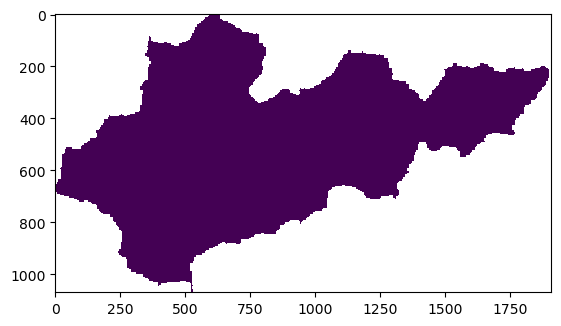

resolution.tif criado!


In [25]:
#Criando o Raster constante
 # Process: Create Constant Raster (Create Constant Raster) (sa)
resolution_tif_path = os.path.join(endereco_processos,"resolution.tif").replace("\\", "/")
resolution_tif = driver.Create(resolution_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
resolution_tif = None

with rasterio.open (Pits_Removed_DTM) as molde:
            transform = molde.transform
            largura_pixel =  transform[0]
            
            dem_data = molde.read(1)
            dem_nodata = molde.nodata
            dem_profile = molde.profile

            mask =  dem_data == dem_nodata # está fazendo um array booleano marcando os lugares de nodata como True

            masked_dem =  np.ma.masked_array(dem_data, mask = mask)
            masked_dem [~mask] = largura_pixel #~ significa not, neste contexto. Isto é, modifica tudo que não é máscara.


 #Salvando o Raster Constante

with rasterio.open (resolution_tif_path, 'w', **dem_profile) as new_dst:
    new_dst.write(masked_dem, 1)
    print(dem_nodata)
    print(new_dst.nodata)
    plt.imshow(masked_dem)
    plt.show()
    print("resolution.tif criado!")           

In [26]:
raster_comparison(resolution_tif_path, resolution_arc)

They are equal: True
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


In [27]:
raw_raster_comparison(resolution_tif_path, resolution_arc)

They are equal: [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

#### Funcao para mascarar os rasters

Esta função recebe um raster aberto pelo rasterio.
Ela primeiro lê os dados da primeira banda
Em seguida salva o valor de no_data disponível nos metadados
Cria uma máscara
Aplica a máscara e define então um masked numpy array

Ela devolve o masked numpy array e o valor do nodata (útil pra debugar)

In [28]:
#funcao para lidar com os valores de nodata

# Esta função recebe um raster aberto pelo rasterio.
# Ela primeiro lê os dados da primeira banda
# Em seguida salva o valor de no_data disponível nos metadados
# Cria uma máscara
# Aplica a máscara e define então um masked numpy array
# Ela devolve o masked numpy array e o valor do nodata (útil pra debugar)

def mascara(src):
  data = src.read(1)
  data_nodata = src.nodata
  masked = data == data_nodata
  masked_data = np.ma.masked_array(data, mask=masked, fill_value=src.nodata)  # Set fill_value to nodata
  return masked_data, data_nodata

### 11 - Divide - Raster Calculator (OK)

In [29]:
#11 DIVIDE - RASTER CALCULATOR - OK
# Process: Divide (Divide) (sa)


ACCfinal_tif_path = os.path.join(endereco_processos,"ACCfinal.tif")
ACCfinal_tif = driver.Create(ACCfinal_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
ACCfinal_tif = None


with rasterio.open(dtmfilloksca_tif_path) as src1, rasterio.open(resolution_tif_path) as src2:
    # Read the data into NumPy arrays

    filloksca,filloksca_nodata = mascara(src1)
    resolution,resolution_nodata = mascara(src2)

    print(filloksca_nodata)
    print(resolution_nodata)



    # plt.imshow(data1) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
    # plt.show()
    # plt.imshow(data2) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
    # plt.show()

    #Fazendo a divisão em si:

    # Check if the two raster datasets have the same shape
    if filloksca.shape == resolution.shape:
        # Perform the division operation
        divisao = ma.divide(filloksca, resolution)
        
        #result_nodata = data_nodata1/data_nodata2 #necessário atualizar o valor do nodata, porque usaremos o perfil de outra como base
        
        
        # plt.imshow(result) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
        # plt.show()

        # Create a new raster dataset for the result
        profile = src1.profile  # Copy the profile from one of the input rasters
        
        # profile.update(nodata = result_nodata) #atualizando o perfil base para ter o no data value novo
        
        
        with rasterio.open(ACCfinal_tif_path, 'w', **profile) as dst:
            dst.write(divisao, 1)
            
            print(f'resultado_nodata {dst.nodata}')
            print("Division operation completed.")
            
            print('Divide complete')
    else:
        print("Raster datasets have different shapes.")




-1.0
-3.4028234663852886e+38
resultado_nodata -1.0
Division operation completed.
Divide complete


In [30]:
noData_Normalisation(ACCfinal_tif_path)

-1.0
The old noData is -1.0, and the new noData is -3.4028234663852886e+38.


In [31]:
raster_comparison(ACCfinal_tif_path, accfinal_arc)

They are equal: True
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


In [32]:
raw_raster_comparison(ACCfinal_tif_path, accfinal_arc)

They are equal: [[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

### 15 - CMEAN (OK)


15 CMEAN

cmeantif created

-1.0
-3.4028230607370965e+38
-3.4028234663852886e+38
Soma realizada!
divisão realizada


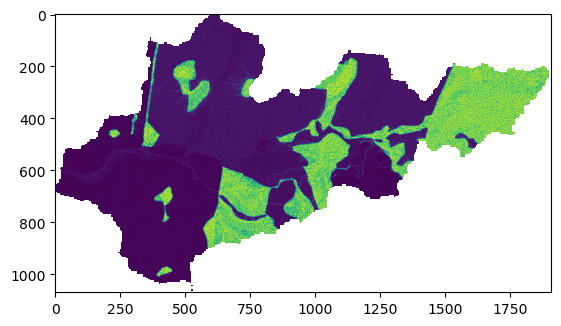

cmean -3.4028230607370965e+38
Computing C mean operation completed.


In [33]:
#15 CMEAN

print ("")        
print("15 CMEAN")
print("")       
# Process: Computing C mean (Raster Calculator) (sa)
cmean_tif_path = os.path.join(endereco_processos,"cmean_2.tif")
cmean_tif = driver.Create(cmean_tif_path, x_dim, y_dim, 1, gdal.GDT_Float64)  # Use Float64 here

cmean_tif = None
print( "cmeantif created")
print("")

with rasterio.open(accW_tif_path) as src1, rasterio.open(Weighting_Factor) as src2, rasterio.open(ACCfinal_tif_path) as src3:
    # Read the data into NumPy masked arrays
    accw, accw_nodata = mascara(src1)
    wfactor, wfactor_nodata = mascara(src2)
    accfinal, accfinal_nodata = mascara(src3)
    
    print(accw_nodata)
    print(wfactor_nodata)
    print(accfinal_nodata)

    soma = ma.add(wfactor,accw)
    print ('Soma realizada!')
    # plt.imshow(result_sum)
    # plt.show()
    

    if accfinal.shape == soma.shape:
        # Perform the division operation
        cmean = ma.divide(soma, accfinal)
        print ('divisão realizada')
        
        plt.imshow(cmean)
        plt.show()

        # plt.imshow(data)
        # plt.show()

        # Create a new raster dataset for the result
        profile = src2.profile  # Copy the profile from one of the input rasters

        with rasterio.open(cmean_tif_path, 'w', **profile) as dst:
            dst.write(cmean, 1)
            print(f'cmean {dst.nodata}')
            print("Computing C mean operation completed.")
    else:
        print("Raster datasets have different shapes.")

In [34]:
raster_comparison(cmean_tif_path, cmean_arc)

They are equal: False
nodata1: -3.4028230607370965e+38
nodata2: -3.4028234663852886e+38


In [35]:
raster_close_enough(cmean_tif_path, cmean_arc)



They are close enough: True
nodata1: -3.4028230607370965e+38
nodata2: -3.4028234663852886e+38


### 6 - Imposing upper and lower limits

In [36]:
#6    
print("")
print("6 imposing upper and lower limits to the slope")
print("")
# Process: Imposing upper and lower limits to Slope (Raster Calculator) (sa)
s_tif_path = os.path.join(endereco_processos,"s.tif")
s_tif = driver.Create(s_tif_path, x_dim, y_dim, 1, gdal.GDT_Float64)

s_tif = None

with rasterio.open(dtmfilloksd8_tif_path) as src:
    profile = src.profile  # Get the raster profile (metadata)
    slope,slope_nodata = mascara(src)   # Read the raster data (assuming it's a single-band raster)
    # Apply upper and lower limits
    # print(data_nodata)
    slope = ma.where(slope > 1, 1, slope)
    slope = ma.where(((slope < 0.005) & (slope != slope_nodata)), 0.005, slope)

    print (slope_nodata)

    # plt.imshow(slope)
    # plt.show()
    # profile.update(nodata=data_nodata)
# Write the processed data to the output raster
with rasterio.open(s_tif_path, 'w', **profile) as dst:
    dst.write(slope, 1)
    print(f'dst_nodata {dst.nodata}')
print("imposing limits to slope complete!")
print("")


6 imposing upper and lower limits to the slope



-1.0
dst_nodata -1.0
imposing limits to slope complete!



In [37]:
raster_comparison(s_tif_path, s_arc)

They are equal: False
nodata1: -1.0
nodata2: -1.7976931348623157e+308


In [38]:
raster_close_enough(s_tif_path, s_arc)

They are close enough: True
nodata1: -1.0
nodata2: -1.7976931348623157e+308


### 12 - accumulating S (D-Infinity Contributing Area)

In [39]:
#12
# Process: accumulating S (D-Infinity Contributing Area) ()
print("12 D infinity contributing area")
print("")
accS_tif_path = os.path.join(endereco_processos,"accS.tif").replace("\\", "/")
accS_tif = driver.Create(accS_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

accS_tif = None

subprocess.run(["areadinf","-ang", dtmfillokang_tif_path, "-sca", accS_tif_path, "-wg", s_tif_path, "-nc"],check=True)

print("D infinity contributing areas complete!")
print("")


12 D infinity contributing area

D infinity contributing areas complete!



In [40]:
raster_comparison(accS_tif_path, accs_arc)

They are equal: True
nodata1: -1.0
nodata2: -1.0


In [41]:
raster_close_enough(accS_tif_path, accs_arc)

They are close enough: True
nodata1: -1.0
nodata2: -1.0


In [42]:
# noData_Normalisation(accS_tif_path)

### 17 - Smean (OK)

In [43]:
#17 (OK)
#17 S Mean - OK
# Process: Computing S mean (Raster Calculator) (sa)
print("17 computing S mean")
print("")

smean_tif_path = os.path.join(endereco_processos,"smean.tif")
smean_tif = driver.Create(smean_tif_path, x_dim, y_dim, 1, gdal.GDT_Float64)  

smean_tif = None

with rasterio.open(accS_tif_path) as src1, rasterio.open(s_tif_path) as src2, rasterio.open(ACCfinal_tif_path) as src3:
    # Read the data into NumPy masked arrays
    accs, accs_nodata = mascara(src1)
    s, s_nodata = mascara(src2)
    accfinal, accfinalnodata = mascara(src3)
    
    # plt.imshow(accs)
    # plt.title('accs')
    # plt.show()
    # plt.imshow(s)
    # plt.title('s')
    # plt.show()
    print(accs_nodata)
    print(s_nodata)
    print(accfinal_nodata)


    # Perform the adding operation
    soma = ma.add(s,accs )
    
    # plt.imshow(soma)
    # plt.title('soma')
    # plt.show()
    
    # plt.imshow(accfinal)
    # plt.title('accfinal')
    # plt.show()

    if accfinal.shape == soma.shape:
        # Perform the division operation
        divisao = ma.divide(soma, accfinal)

        # Create a new raster dataset for the result
        profile = src1.profile  # Copy the profile from one of the input rasters

        with rasterio.open(smean_tif_path, 'w', **profile) as dst:
            dst.write(divisao, 1)  # Use filled() to handle masked values

            print(f'resultado_nodata: {dst.nodata}')
            print("Division operation completed.")
            print("")
            # plt.imshow(divisao)
            # plt.title('smean_tif')
            # plt.show()
    else:
        print("Raster datasets have different shapes.")

17 computing S mean

-1.0
-1.0
-3.4028234663852886e+38
resultado_nodata: -1.0
Division operation completed.



In [44]:
raster_comparison(smean_tif_path, smean_arc)

They are equal: False
nodata1: -1.0
nodata2: -1.7976931348623157e+308


In [45]:
raster_close_enough(smean_tif_path, smean_arc)

They are close enough: True
nodata1: -1.0
nodata2: -1.7976931348623157e+308


### 4 - Accumulating q

In [46]:
#4 
print("")
print("4 Acummulating q")  
# Process: Accumulating q (D-Infinity Contributing Area) () 
accq_tif_path = os.path.join(endereco_processos,"accq.tif").replace("\\", "/")
accq_tif = driver.Create(accq_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)

accq_tif = None
print("")
print("accq_tif created")
print("")
subprocess.run(["areadinf","-ang", dtmfillokang_tif_path, "-sca", accq_tif_path, "-wg", Qrunoff, "-nc"],check=True)


4 Acummulating q

accq_tif created



CompletedProcess(args=['areadinf', '-ang', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/dtmfillokang.tif', '-sca', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/accq.tif', '-wg', 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/E2_Qsup.tif', '-nc'], returncode=0)

In [47]:
raster_comparison(accq_tif_path, accq_arc)

They are equal: True
nodata1: -1.0
nodata2: -1.0


In [48]:
raster_close_enough(accq_tif_path,accq_arc)

They are close enough: True
nodata1: -1.0
nodata2: -1.0


In [49]:
# noData_Normalisation(accq_tif_path)

### 10 - Unit Transformation (OK)

In [50]:
#10  transformacao - OK
# Process: unittransformation (Raster Calculator) (sa)
print("unit transformation")

qrunm_tif_path = os.path.join(endereco_processos,"qrunm.tif").replace("\\", "/")
qrunm_tif = driver.Create(qrunm_tif_path, x_dim, y_dim, 1, gdal.GDT_Float64)  

qrunm_tif = None

with rasterio.open(accq_tif_path) as src:
    profile = src.profile  # Get the raster profile (metadata)
    data,data_nodata = mascara(src)    # Read the raster data (assuming it's a single-band raster)
    print(data_nodata)
    result = data/1000 
    #data1type = data.dtype
    #result_type = result.dtype
    
    # print("Data 1 type: " , data1type)
    # print("result type: ", result_type)

    
with rasterio.open(qrunm_tif_path, 'w', **profile) as dst: #qrunm é o accq corrigido
    dst.write(result, 1)
    print(f'final: {dst.nodata}')
print("Unit transformation complete!")
print("")




unit transformation
-1.0
final: -1.0
Unit transformation complete!



In [51]:
raster_comparison(qrunm_tif_path, qrunm_arc)

They are equal: False
nodata1: -1.0
nodata2: -3.4028234663852886e+38


In [52]:
raster_close_enough(qrunm_tif_path, qrunm_arc)

They are close enough: True
nodata1: -1.0
nodata2: -3.4028234663852886e+38


### 16 - IPS - Raster Calculator (OK)

In [53]:
#16 - OK
# Process: IPSs (Raster Calculator) (sa)

print("starting IPS!")
print("")
IPSxQr_path = os.path.join(endereco_processos,"IPSxQr.tif").replace("\\", "/")
IPSxQr = driver.Create(IPSxQr_path, x_dim, y_dim, 1, gdal.GDT_Float64)  

IPSxQr = None

with rasterio.open(IPS) as src1, rasterio.open(qrunm_tif_path) as src2:
    profile = src1.profile  # Get the raster profile (metadata)
    
    ips, ips_nodata = mascara(src1)  
    qrunm, qrunm_nodata = mascara(src2)
    print(ips_nodata)
    print(qrunm_nodata)
    # plt.imshow(ips)
    # plt.title('ips')
    # plt.show()
    
    # plt.imshow(qrunm)
    # plt.title('qrunm')
    # plt.show()


    produto = ma.multiply(ips,qrunm)
    
    # plt.imshow(produto)
    # plt.title('produto')
    # plt.show()

# Write the processed data to the output raster
with rasterio.open(IPSxQr_path, 'w', **profile) as dst:
    dst.write(produto, 1)
    print(f'final: {dst.nodata}')
print("IPSs complete!")
print("")



starting IPS!

-3.4028234663852886e+38
-1.0
final: -3.4028234663852886e+38
IPSs complete!



In [54]:
raster_comparison(IPSxQr_path, ipsxqr_arc)

They are equal: False
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


In [55]:
raster_close_enough(IPSxQr_path, ipsxqr_arc)

They are close enough: True
nodata1: -3.4028234663852886e+38
nodata2: -3.4028234663852886e+38


### 19 - Computing Upslope Component - Raster Calculator (OK)

In [56]:
#19  #VERIFICAR
# Process: Computing Upslope Component (Raster Calculator) (sa)
print("starting computing upslope component")
print("")
Dup_tif_path = os.path.join(endereco_processos,"Dup.tif").replace("\\", "/")
Dup_tif = driver.Create(Dup_tif_path, x_dim, y_dim, 1, gdal.GDT_Float64)  

Dup_tif = None

with rasterio.open(cmean_tif_path) as src1, rasterio.open(smean_tif_path) as src2, rasterio.open(IPSxQr_path) as src3, rasterio.open(resolution_tif_path) as src4 :
    profile = src1.profile 
    
    cmean, cmean_nodata = mascara (src1)
    smean, smean_nodata = mascara (src2)
    IPSxQr, IPSxQr_nodata = mascara (src3)
    resolution, resolution_nodata = mascara (src4)

    print(cmean_nodata)
    print(smean_nodata)
    print(IPSxQr_nodata)
    print(resolution_nodata)

    print(cmean_nodata)
    
    upslope = cmean * smean * IPSxQr * resolution * resolution # Atenção, todos aqui são masked arrays, então não tem problema fazer o cálculo assim.
 

    
    
with rasterio.open(Dup_tif_path, 'w', **profile) as dst:
    dst.write(upslope, 1)
    print(f'final:  {dst.nodata}')
print ("upslope component complete!")

starting computing upslope component

-3.4028230607370965e+38
-1.0
-3.4028234663852886e+38
-3.4028234663852886e+38
-3.4028230607370965e+38
final:  -3.4028230607370965e+38
upslope component complete!


c:\Users\artur\anaconda3\envs\rasterio\lib\site-packages\numpy\ma\core.py:1020: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [57]:
raster_comparison(Dup_tif_path, dup_arc)

They are equal: False
nodata1: -3.4028230607370965e+38
nodata2: -1.7976931348623157e+308


In [58]:
raster_close_enough(Dup_tif_path, dup_arc)

They are close enough: True
nodata1: -3.4028230607370965e+38
nodata2: -1.7976931348623157e+308


### 7 - Reclassify (OK)

In [59]:

#7 
# Process: Reclassify (Reclassify) (sa)
print("")
print("7 reclassifying")
flowd8_path = os.path.join(endereco_processos,"flowd8.tif").replace("\\", "/")
flowd8 = driver.Create(flowd8_path, x_dim, y_dim, 1, gdal.GDT_Float64)  

flowd8 = None
with rasterio.open(dtmfillokp_tif_path) as src: #fillokp é o d8 directions
    d8dir,d8dir_nodata =  mascara(src)
    profile = src.profile
    

    print(d8dir_nodata)
    # plt.imshow(d8dir)
    # plt.title('fillokd8')
    # plt.show()

    reclassified_data = np.select(
        [d8dir == 1, d8dir == 2, d8dir == 3, d8dir == 4, d8dir == 5, d8dir == 6, d8dir == 7, d8dir == 8],
        [1, 128, 64, 32, 16, 8, 4, 2], default=d8dir
    )  #Não entendi pq fazer isso
    
    reclassified_data = ma.array(reclassified_data, mask=ma.getmask(d8dir)) # fazendo com que ele volte a ser um masked array copiando a máscara do orignal
    
    
    # plt.imshow(reclassified_data)
    # plt.title('reclassified')
    # plt.show()

with rasterio.open(flowd8_path, 'w', **profile) as dst:
    dst.write(reclassified_data, 1)
    print(f'final: {dst.nodata}')
print("Reclassify complete!")
print("")


7 reclassifying
-32768.0
final: -32768.0
Reclassify complete!



### 14 - Integrating Sinks - (OK)

In [60]:
# 14 VERIFICAR - OK, só muda o nome da variável mesmo.
# Process: Integrating Sinks and Targets into D8 Flow directions (Raster Calculator) (sa)
print("14 starting process of integrating sinks ")
print("")
flowdir_tif_path = os.path.join(endereco_processos, "flowdir.tif").replace("\\", "/")

with rasterio.open(flowd8_path) as src:
    profile = src.profile 
    data = src.read(1) 

    with rasterio.open(flowdir_tif_path, 'w', **profile) as dst:
        dst.write(data, 1)
print("integration complete!")
print("")


14 starting process of integrating sinks 

integration complete!



In [61]:
raster_comparison(flowdir_tif_path, flowdir_arc)

They are equal: False
nodata1: -32768.0
nodata2: 255.0


In [62]:
raster_close_enough(flowdir_tif_path, flowdir_arc)

They are close enough: True
nodata1: -32768.0
nodata2: 255.0


### 13 - 1/(W*S) (Not OK)


Min and Mean of te calculation is different from the Arcgis file
The mask works well
the operation are correct
Mybe the problem is the size of the file with an error of 0,0001 (south and north)

In [63]:
#13
# Process: Computing 1/(W*S) (Raster Calculator) (sa)
        
print("13 computing 1/(W*S)")
print("")
invCS_tif_path = os.path.join(endereco_processos, "invCS_power.tif").replace("\\", "/")

with rasterio.open(Weighting_Factor) as src1, rasterio.open(s_tif_path) as src2 : 
    
    profile = src1.profile 
    
    wfactor,wfactor_nodata = mascara(src1) 
    s, s_nodata= mascara(src2) 

    w_vezes_s = wfactor * s
    
    divisao_power = ma.power(w_vezes_s, -1)

    # Other ways of performing the division, but have to fix the nodata values
    # divisao_1 = ma.divide(1,w_vezes_s)
    
    # divisao = 1/(wfactor * s)

    
with rasterio.open(invCS_tif_path, 'w', **profile) as dst:
    dst.write(divisao_power, 1)
    print(dst.nodata)
print(" complete!")
print("")



13 computing 1/(W*S)

-3.4028230607370965e+38
 complete!



In [64]:
raster_comparison(invCS_tif_path, invcs_arc)

They are equal: False
nodata1: -3.4028230607370965e+38
nodata2: -1.7976931348623157e+308


In [65]:
raster_close_enough(invCS_tif_path, invcs_arc)

They are close enough: True
nodata1: -3.4028230607370965e+38
nodata2: -1.7976931348623157e+308


In [66]:
# s_tif_path = os.path.join(endereco_processos,"s.tif")
# # cmean_tif_path = os.path.join(endereco_processos,"cmean_2.tif")
# qrunm_tif_path = os.path.join(endereco_processos,"qrunm.tif").replace("\\", "/")
# ACCfinal_tif_path = os.path.join(endereco_processos,"ACCfinal.tif")
# accS_tif_path = os.path.join(endereco_processos,"accS.tif").replace("\\", "/")
# ips = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/E2_IPS.tif'
# IPS = os.path.join(ips)
# IPSxQr_path = os.path.join(endereco_processos,"IPSxQr.tif").replace("\\", "/")
# resolution_tif_path = os.path.join(endereco_processos,"resolution.tif").replace("\\", "/")
# smean_tif_path = os.path.join(endereco_processos,"smean.tif")
# Dup_tif_path = os.path.join(endereco_processos,"Dup.tif").replace("\\", "/")
# dtmfillokp_tif_path = os.path.join(endereco_processos, "dtmfillokp.tif").replace("\\", "/")
# flowd8_path = os.path.join(endereco_processos,"flowd8.tif").replace("\\", "/")
# weighting = 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/Wrs_A.tif'
# Weighting_Factor = os.path.join(weighting)
# invCS_tif_path = os.path.join(endereco_processos, "invCS.tif").replace("\\", "/")
# Ddn_tif_path = os.path.join(endereco_processos,"Ddn.tif").replace("\\", "/")
# X_tif_path = os.path.join(endereco_processos, "X.tif").replace("\\", "/")
# IHC = os.path.join(endereco_saida, "ihc_nodata_fixed.tif")
# invCS_tif_path = os.path.join(endereco_processos, "invCS.tif").replace("\\", "/")
# flowdir_tif_path = os.path.join(endereco_processos, "flowdir.tif").replace("\\", "/")

### 18 - Flowlenght - Distance_down_tif - taudem method

In [67]:
#this method substitues the flowlength step, that is a function from arcgis. 

distance_down_tif_path =  os.path.join(endereco_processos,"distance_down.tif").replace("\\", "/")
distance_down_tif = driver.Create(distance_down_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
distance_down_tif= None

subprocess.run(["DinfDistDown","-ang", dtmfillokang_tif_path, "-fel",  Weighting_Factor, "-src", target_tif_path,  
            "-wg", invCS_tif_path,"-dd", distance_down_tif_path,"-m", "min s" , "-nc"])

CompletedProcess(args=['DinfDistDown', '-ang', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/dtmfillokang.tif', '-fel', 'C:/Users/artur/OneDrive/Documentos/IHC/Entradas/Wrs_A.tif', '-src', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/outlet.tif', '-wg', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/invCS_power.tif', '-dd', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/distance_down.tif', '-m', 'min s', '-nc'], returncode=0)

#### 18 - Flowlength

In [68]:
# #18 VERIFICAR gridnet
# print("18 starting flow length")
# # Process: Flow Length (Flow Length) (sa)
# X_tif_path = os.path.join(endereco_processos, "X.tif").replace("\\", "/")
# X_tif = driver.Create(X_tif_path,x_dim, y_dim, 1, gdal.GDT_Float64)
# X_tif = None

# subprocess.run(["gridnet","-p", flowdir_tif_path, "-plen", X_tif_path, "-mask", invCS_tif_path, '-thresh', '500'],check=True)
# print ("Flowlenght complete!")
# print("")


In [69]:
# import subprocess

# command = [
#     'gridnet', 
#     '-p', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/flowdir.tif', 
#     '-plen', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/X.tif', 
#     '-mask', 'C:/Users/artur/OneDrive/Documentos/IHC/Processamento/invCS.tif', 
#     '-thresh', '500'  # Ensure the threshold is a valid positive integer
# ]

# try:
#     result = subprocess.run(command, check=True, capture_output=True, text=True)
#     print(result.stdout)
# except subprocess.CalledProcessError as e:
#     print(f"Command '{e.cmd}' returned non-zero exit status {e.returncode}.")
#     print(e.stderr)
# except Exception as e:
#     print(f"An error occurred: {e}")

In [70]:
# noData_Normalisation(X_tif_path)

### 20 - DownslopeComponent - Raster Calculator (OK)

20 Downslope component


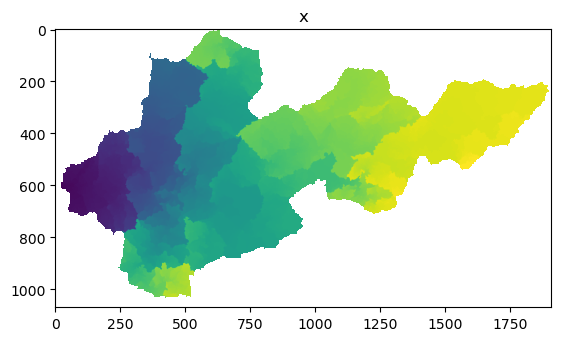

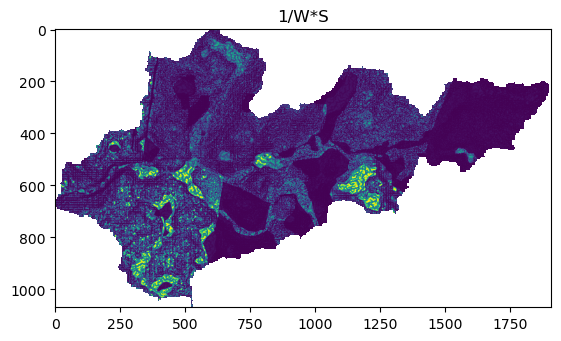

downslope component complete!



In [71]:
#20
print("20 Downslope component")

# Process: Computing Downslope Component (Raster Calculator) (sa)
Ddn_tif_path = os.path.join(endereco_processos,"Ddn.tif").replace("\\", "/")

with rasterio.open(distance_down_tif_path) as src1, rasterio.open(invCS_tif_path) as src2 : #invCS é o passo 13
    
    profile = src1.profile 
    
    x, x_nodata= mascara(src1)   
    inv, inv_nodata= mascara(src2)
    
    plt.imshow(x)
    plt.title('x')
    plt.show()
    plt.imshow(inv)
    plt.title('1/W*S')
    plt.show()
    
    # print(inv_nodata)
    ddn = ma.where(x==0,inv,x)  #onde x for zero, ele coloca o valor de inv, outros casos, valor de x
    
    # plt.imshow(ddn)
    # plt.title('ddn')
    # plt.show()
    
with rasterio.open(Ddn_tif_path, 'w', **profile) as dst:
    dst.write(ddn, 1)
print("downslope component complete!")
print("")

In [72]:
IHC = os.path.join(endereco_saida, "ihc_distance_masked.tif")

### 21 - IHC

21 STARTING IHC
-3.4028230607370965e+38
-3.4028234663852886e+38


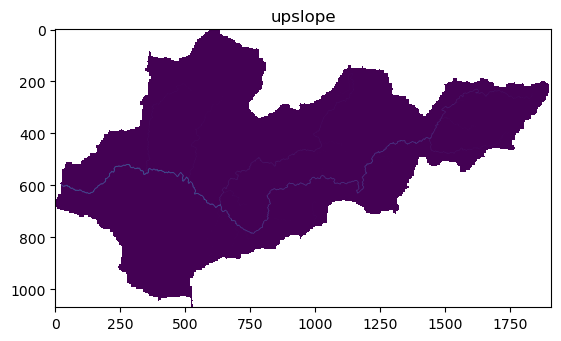

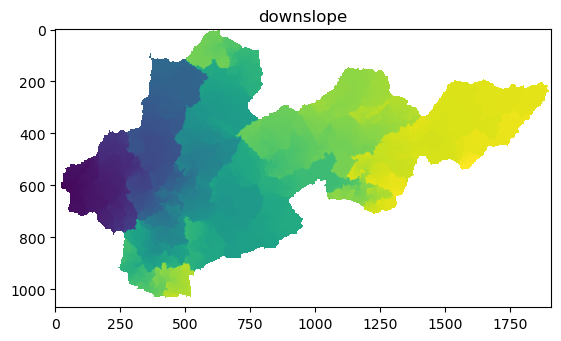

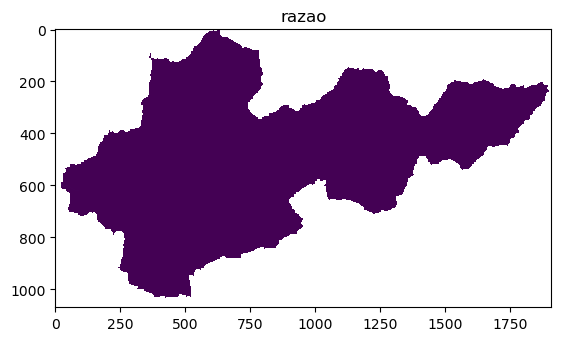

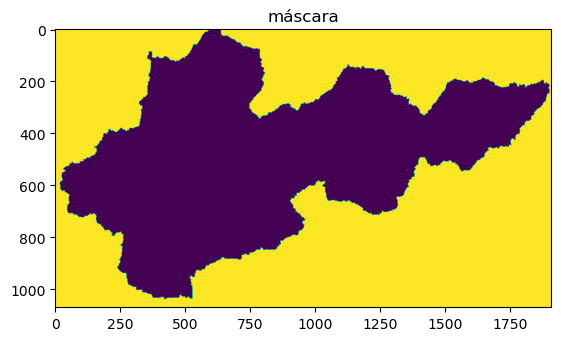

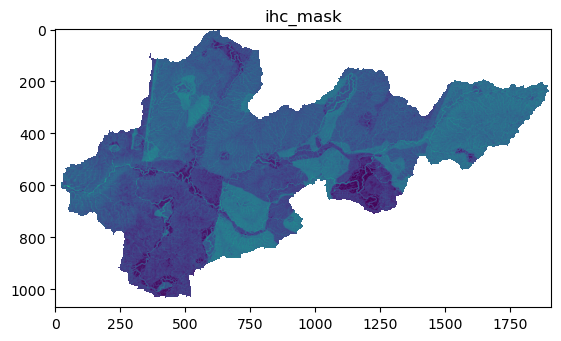

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]
-3.4028230607370965e+38
ihc complete!



In [73]:
#21
# Process: Computing Connectivity Index (Raster Calculator) (sa)
print("21 STARTING IHC")

with rasterio.open(Dup_tif_path) as src1, rasterio.open(Ddn_tif_path) as src2 : 
    profile = src1.profile 
    
    upslope, upslope_nodata = mascara(src1)
    downslope, downslope_nodata = mascara(src2)

    print(upslope_nodata)
    print(downslope_nodata)
    
    plt.imshow(upslope)
    plt.title('upslope')
    plt.show()
    plt.imshow(downslope)
    plt.title('downslope')
    plt.show()
     
    
    razao = ma.divide(upslope, downslope)
    
    # plt.imshow(razao)
    # plt.title('razao')
    # plt.show()
    
    ihc_final = ma.log10(razao)

    mask = downslope.mask

    ihc_final_mascara = ma.masked_array(ihc_final, mask = downslope.mask)
    
    plt.imshow(razao)
    plt.title('razao')
    plt.show()

    plt.imshow(mask)
    plt.title('máscara')
    plt.show()

    plt.imshow(ihc_final_mascara)
    plt.title('ihc_mask')
    plt.show()

    print(mask)
    
    # Apply the condition to keep values less than 20

    #condition = division_result < 20
    #result = np.where(condition, result, 20)  # Set values outside the condition to 0
    
with rasterio.open(IHC, 'w', **profile) as dst:
    dst.write(ihc_final_mascara, 1)
    print(dst.nodata)
    
print("ihc complete!")
print("")

In [209]:
print(mask)

[[ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]
 [ True  True  True ...  True  True  True]]


In [ ]:
#Função para fazer máscara

def mascara (src):
    data = src.read(1)
    data_nodata = src.nodata
    masked = data == data_nodata
    masked_data = np.ma.masked_array(data, mask = masked )
    return masked_data


In [215]:


import numpy as np

 
print("My numpy version is: ", ma.__version__)

AttributeError: module 'numpy.ma' has no attribute '__version__'

In [ ]:
# with rasterio.open(accW_tif_path) as src1, rasterio.open(Weighting_Factor) as src2, rasterio.open(ACCfinal_tif_path) as src3:
#     # Read the data into NumPy masked arrays
#     data1 = src1.read(1)
#     data2 = src2.read(1)
#     data3 = src3.read(1)
#     print('data1')
#     plt.imshow(data1)
#     plt.show()
#     print ('data 2')
#     plt.imshow(data2) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
#     plt.show()
#     print ('data 3')
#     plt.imshow(data2) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
#     plt.show()

# #Máscaras - necessário 
#     data1_nodata = src1.nodata
#     mask_1 = data1 == data1_nodata
#     masked_data1 = np.ma.masked_array(data1, mask = mask_1)

#     data2_nodata = src2.nodata
#     mask_2 = data2 == data2_nodata
#     masked_data2 = np.ma.masked_array(data2, mask = mask_1)

#     data3_nodata = src3.nodata
#     mask_3 = data3 == data3_nodata
#     masked_data3 = np.ma.masked_array(data3, mask = mask_1)

#     print('data1 - máscara')
#     plt.imshow(masked_data1)
#     plt.show()
#     print ('data 2 - máscara')
#     plt.imshow(masked_data2) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
#     plt.show()
#     print ('data 3 - máscara')
#     plt.imshow(masked_data3) #Aqui a gente consegue ver que a parte de fora está com valores absurdos
#     plt.show()









# criando a máscara para tornar as coisas fora do contorno inúteis na hora de fazer os cálculos
   
    # data2_nodata = src2.nodata

    # mask_2 =  data2 == data2_nodata

    # masked_data2 =  np.ma.masked_array(data2, mask = mask_2)
    # masked_data2= np.where(mask_2, np.nan, data2)
    # plt.imshow(masked_data2)
    # plt.show()
